In [1]:
# Load packages
import pandas as pd
import numpy as np
import datetime
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

# Set so jupyter displays all columns
pd.set_option('display.max_columns', False)

# Set Seaborn style for plots
sns.set()

In [2]:
# Change directory and load data
os.chdir('../data/interim')
df1 = pd.read_csv('joined data pre-markdowns.csv')
df2 = pd.read_csv('joined data post-markdowns.csv')

In [3]:
# Concatenate df1 and df2
dfcon = pd.concat([df1, df2], ignore_index=True)

In [4]:
# Drop partially Null MarkDown columns from dfcon
dfcon.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

In [5]:
# Group dataframe by store and date and aggregate sum weekly sales
dfcongroup1 = dfcon.groupby(['Store', 'Date'])[['Weekly_Sales', 'Type']].sum().sort_index()

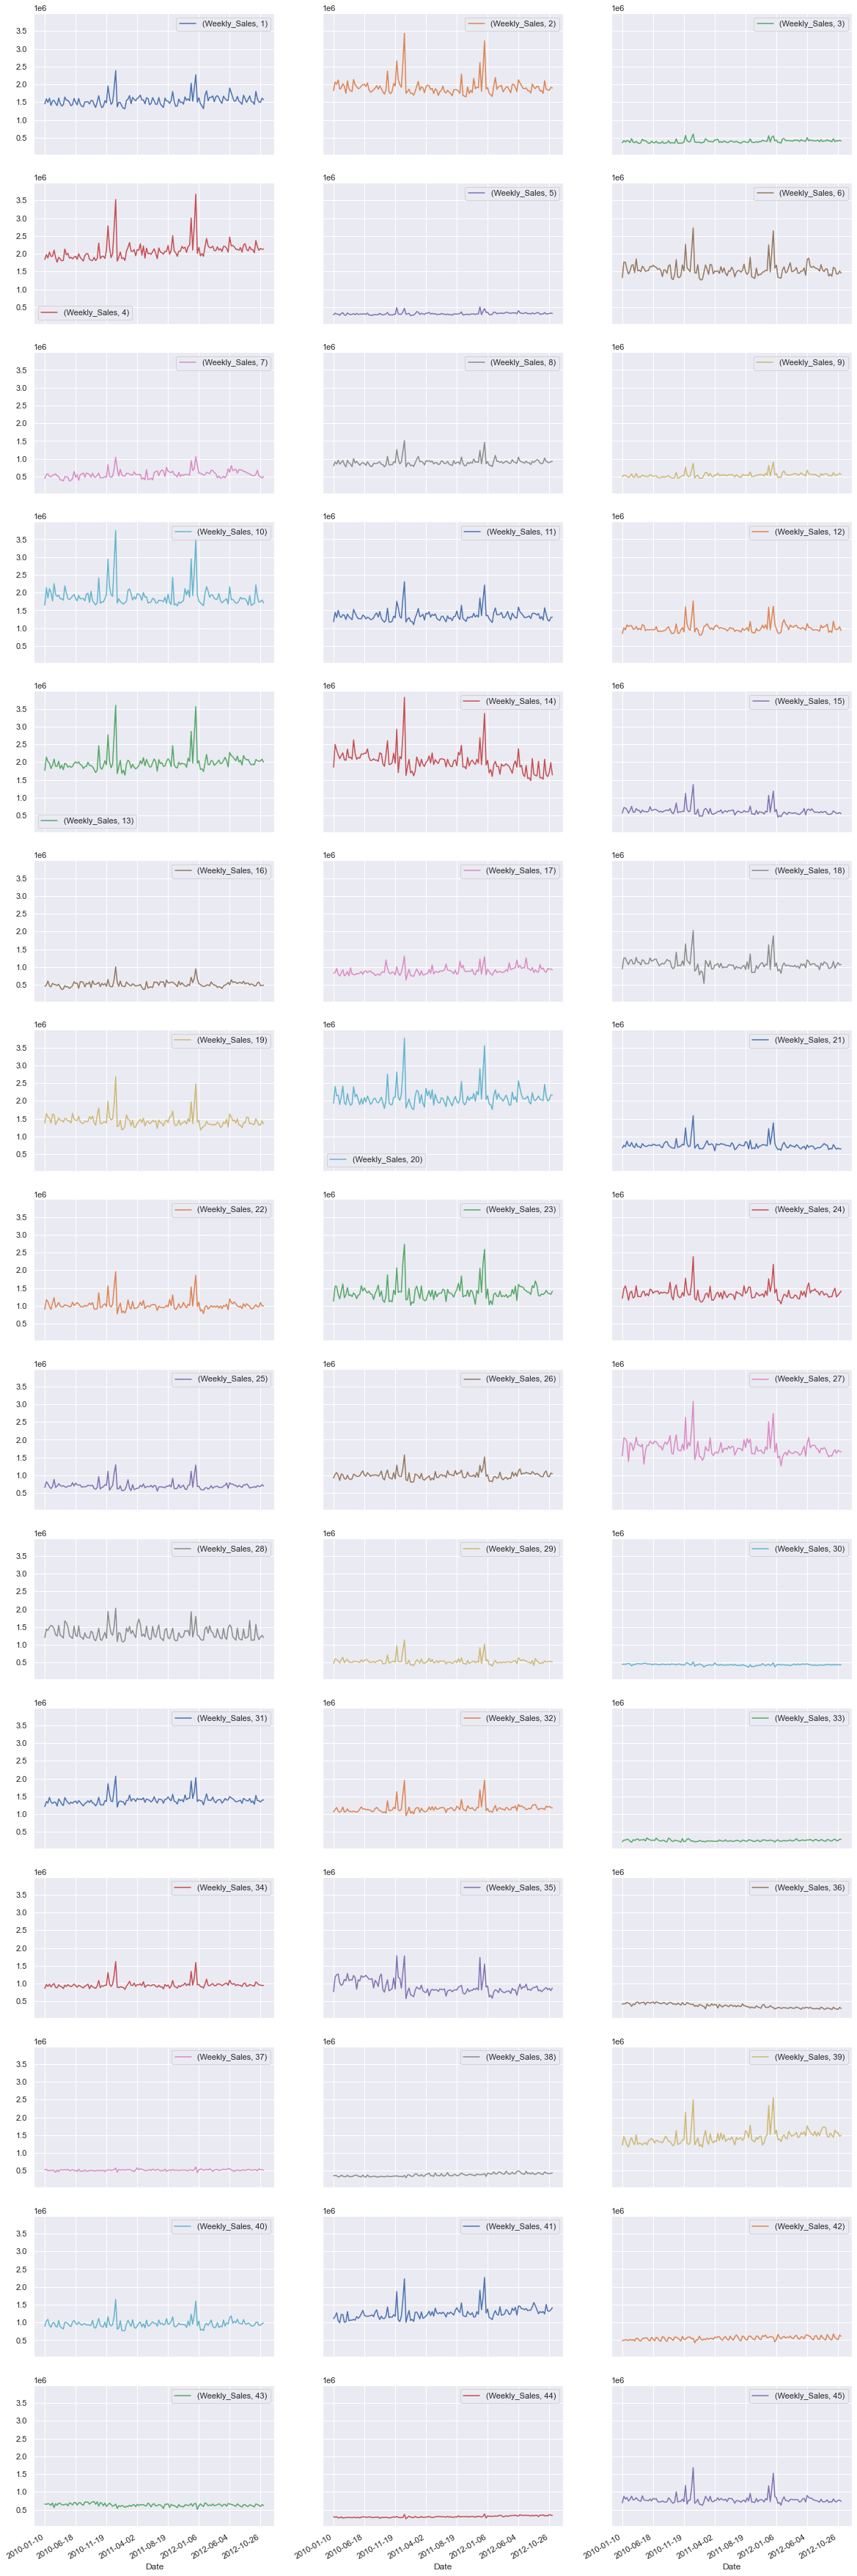

In [6]:
# Plot store-wide weekly sales for all stores, ordered by date
_ = dfcongroup1.unstack(level=0).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
_ = plt.ylabel('Weekly Sales')
plt.show()
plt.close()

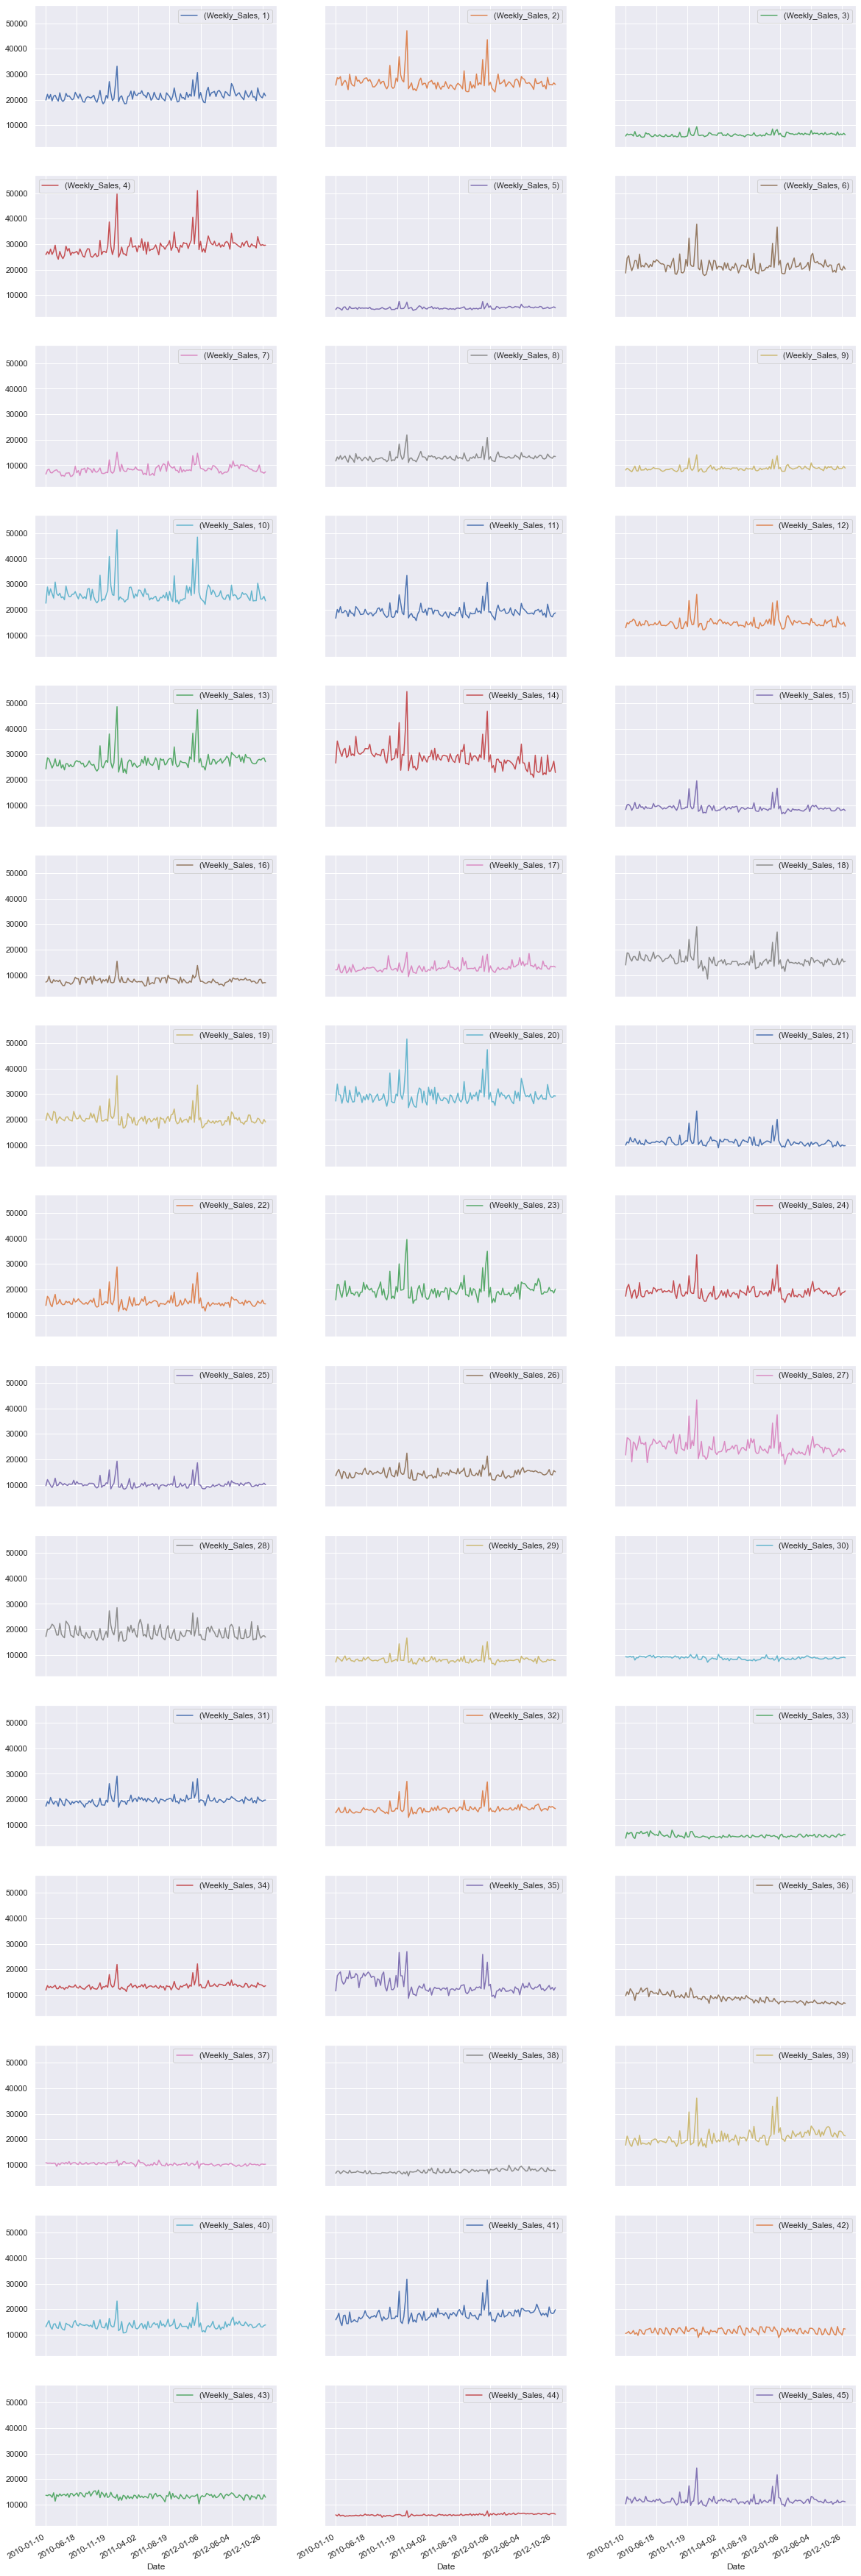

In [7]:
# Do the same but aggregating for mean rather than sum
dfcongroup1m = dfcon.groupby(['Store', 'Date'])[['Weekly_Sales', 'Type']].mean().sort_index()
_ = dfcongroup1m.unstack(level=0).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
_ = plt.ylabel('Weekly Sales')
plt.show()
plt.close()

There are clearly major spikes around Thanksgiving and Christmas each year

In [8]:
# Group dataframe by date and Type and aggregate sum weekly sales
dfcongroup2 = dfcon.groupby(['Date', 'Type'])[['Weekly_Sales']].sum().sort_index()

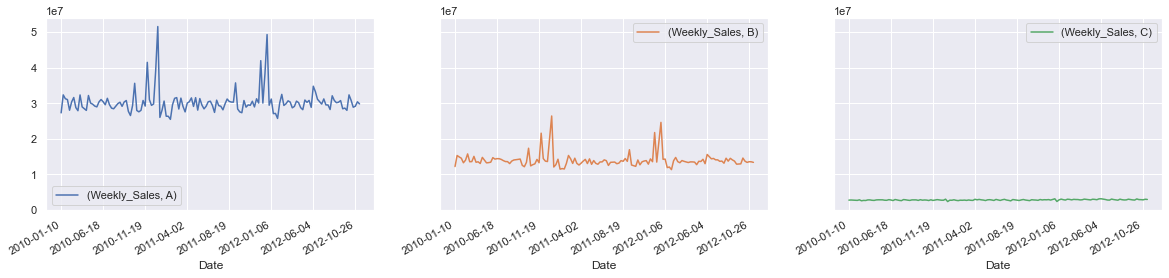

In [9]:
# Plot store-wide weekly sales for all store types, ordered by date
_ = dfcongroup2.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
plt.show()
plt.close()

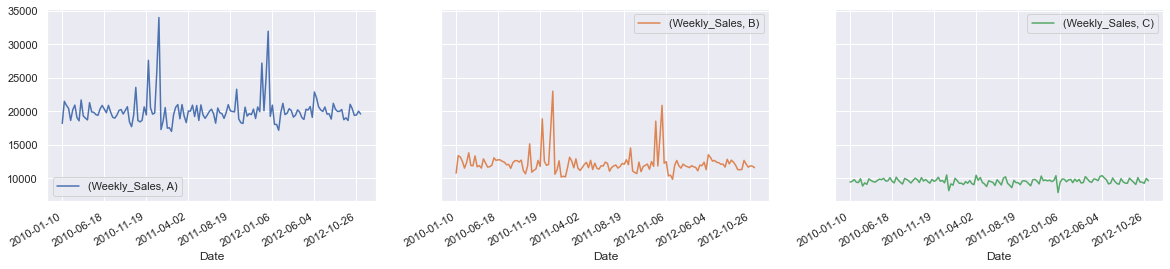

In [10]:
# Do the same but aggregating for mean rather than sum
dfcongroup2m = dfcon.groupby(['Date', 'Type'])[['Weekly_Sales']].mean().sort_index()
_ = dfcongroup2m.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
_ = plt.ylabel('Weekly Sales')
plt.show()
plt.close()

In [11]:
# Group dataframe by date and department and aggregate sum weekly sales
dfcongroup3 = dfcon.groupby(['Date', 'Dept'])[['Weekly_Sales']].sum().sort_index()

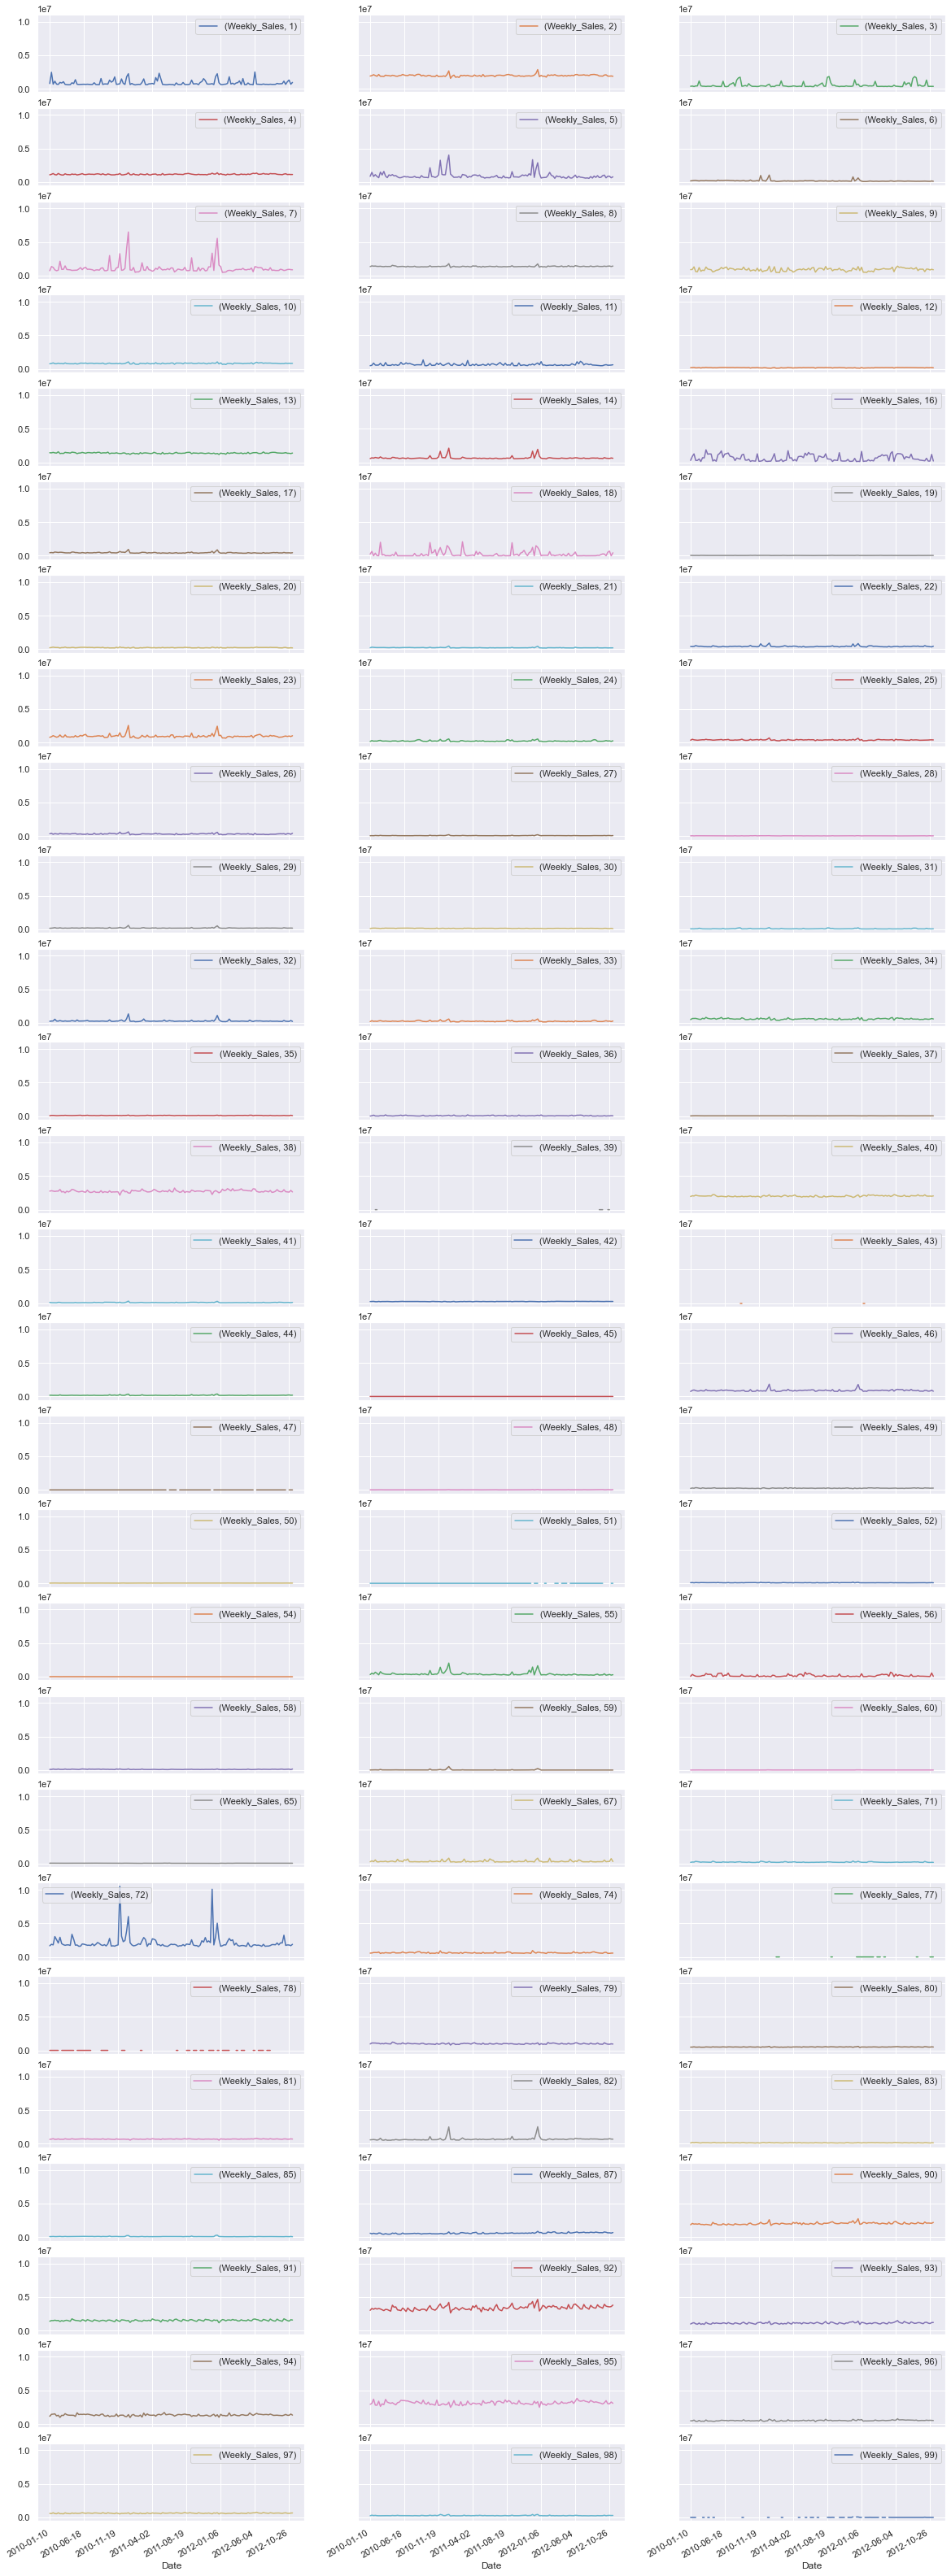

In [12]:
# Plot store-wide weekly sales for all departments, ordered by date
_ = dfcongroup3.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (30, 3), sharey=True, sharex=True)
plt.show()
plt.close()

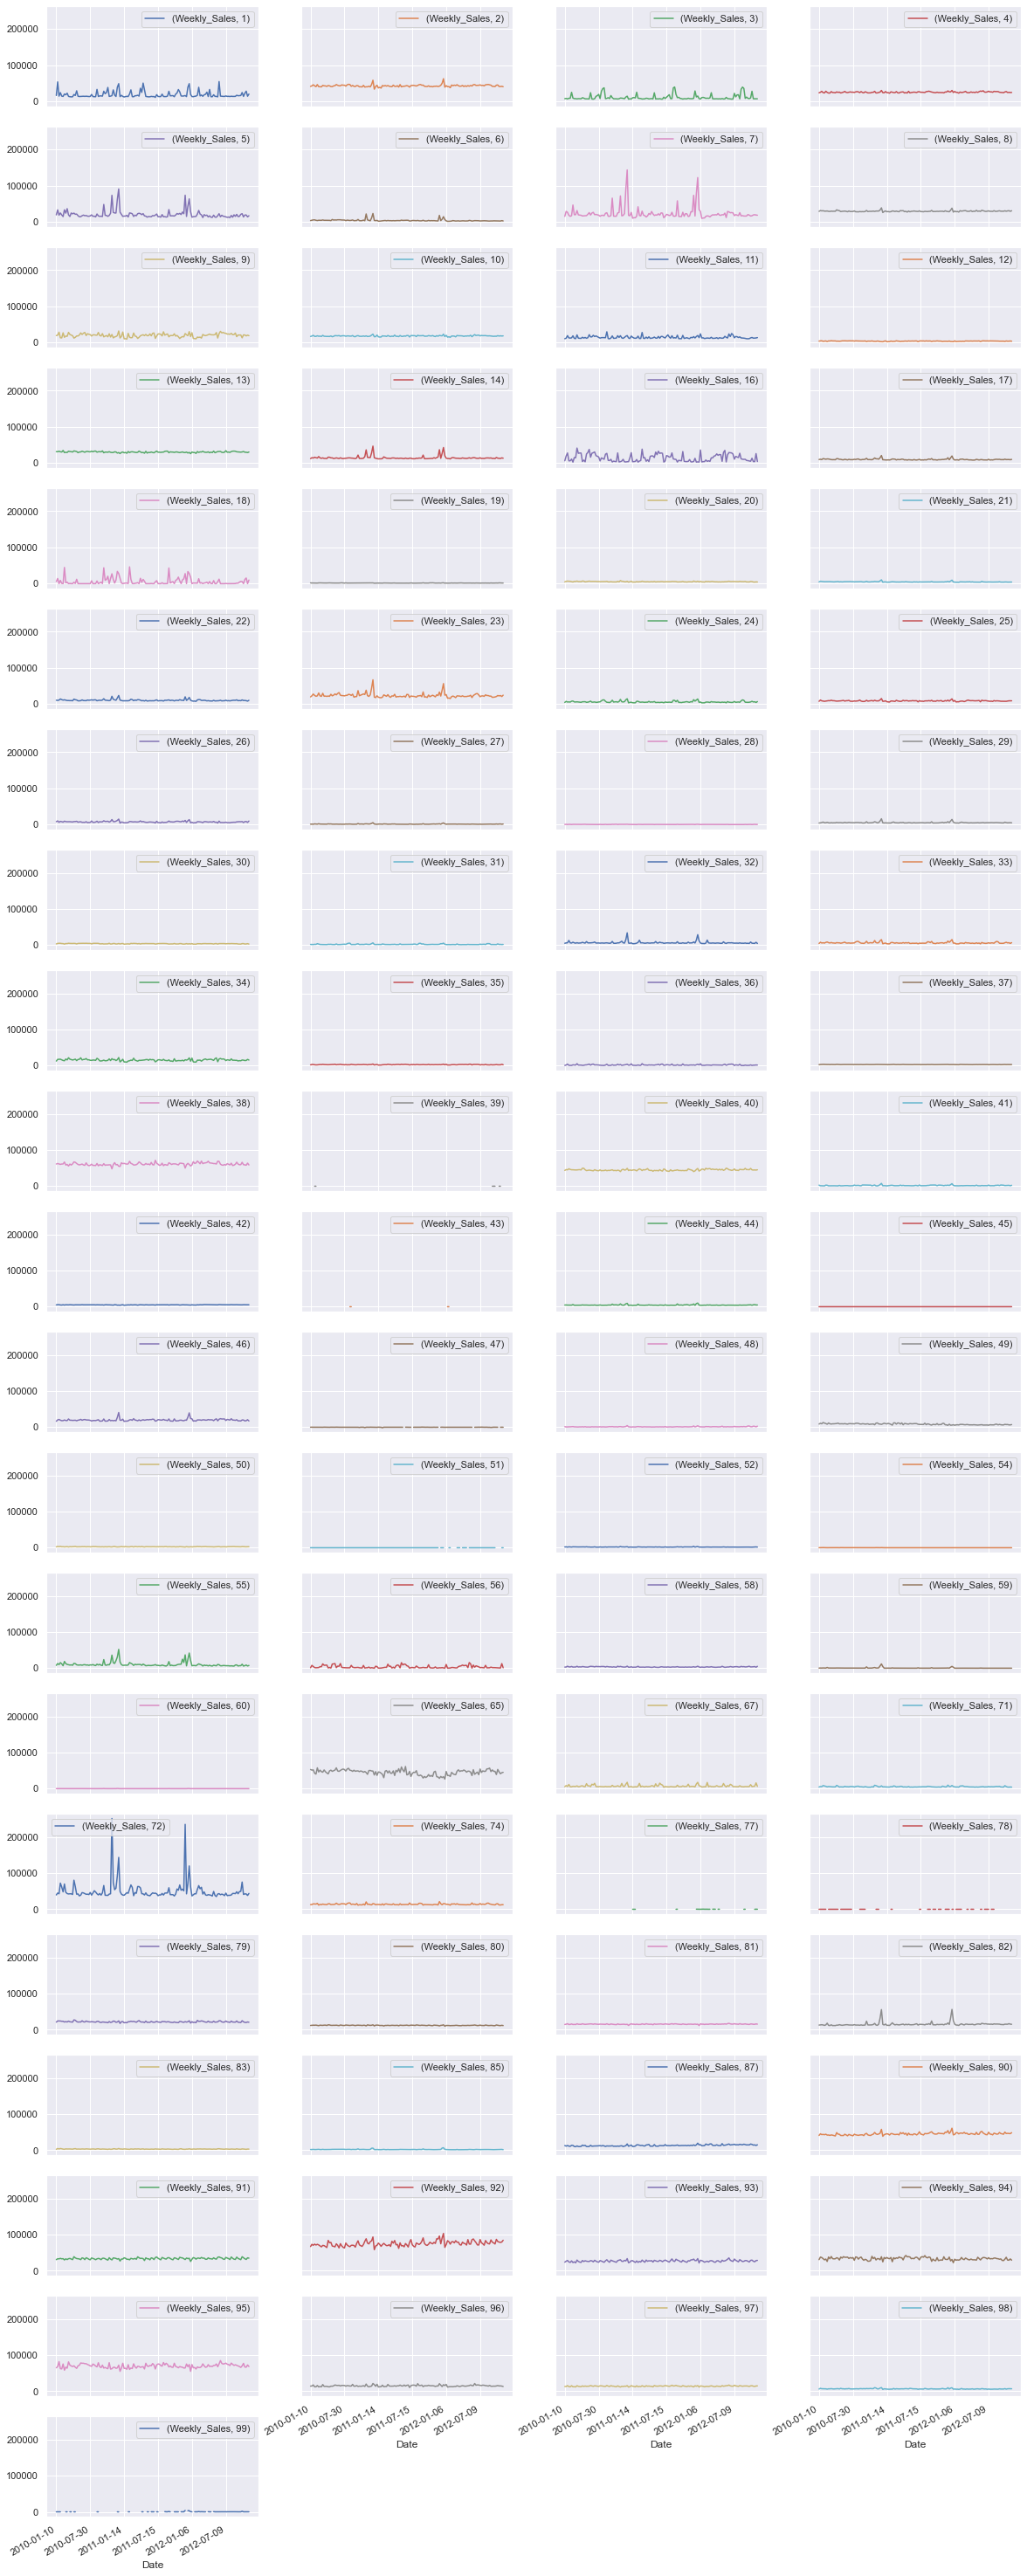

In [13]:
# Do the same but aggregating for mean rather than sum
dfcongroup3m = dfcon.groupby(['Date', 'Dept'])[['Weekly_Sales']].mean().sort_index()
_ = dfcongroup3m.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (25, 4), sharey=True, sharex=True)
plt.show()
plt.close()

In [14]:
# Group data by department and aggregate mean weekly sales
dfcongroup4 = dfcon.groupby(['Dept'])[['Weekly_Sales']].mean().reset_index()

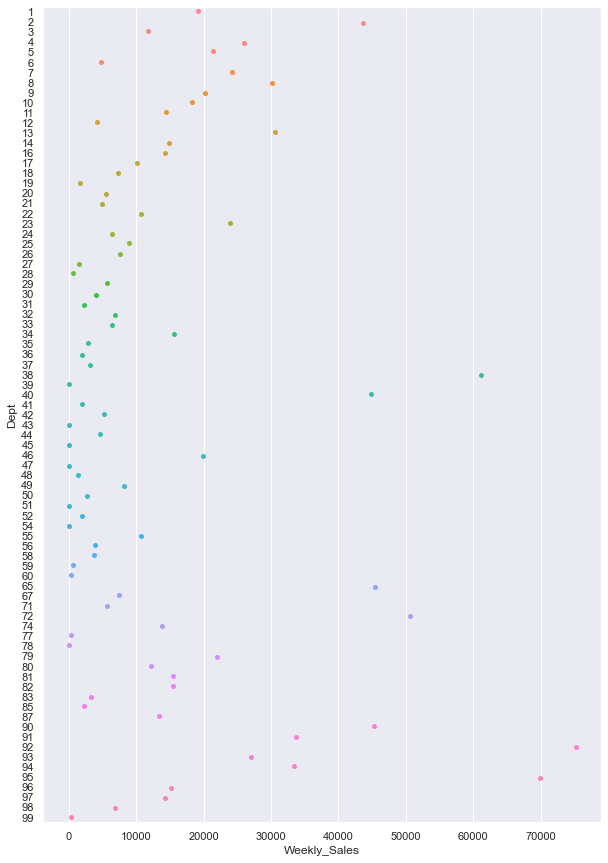

In [15]:
# Plot stripplot of department mean weekly sales to get a sense of spread
_, ax = plt.subplots(figsize=(10, 15))
_ = sns.stripplot(x='Weekly_Sales', y='Dept', data=dfcongroup4, ax=ax, orient='h')
plt.show()
plt.close()

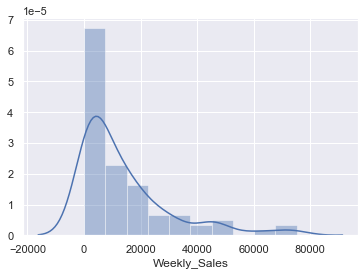

In [16]:
# Plot distplot plot of department mean weekly sales to get a sense of distribution.
_ = sns.distplot(dfcongroup4['Weekly_Sales'])
plt.show()
plt.close()

In [17]:
# Do the same with stores
dfcongroup5 = dfcon.groupby(['Store', 'Type'])[['Weekly_Sales']].mean().reset_index()

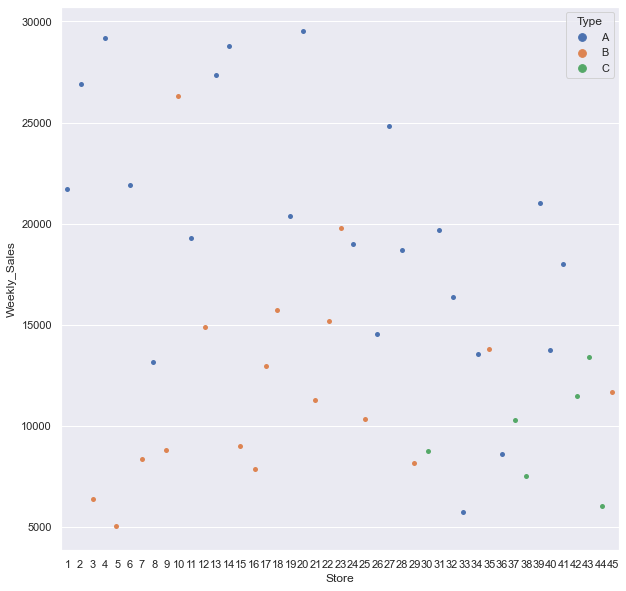

In [18]:
# Strip plot of all stores, hue by type
_, ax = plt.subplots(figsize=(10, 10))
_ = sns.stripplot(x='Store', y='Weekly_Sales', hue='Type', data=dfcongroup5, ax=ax)
plt.show()
plt.close()

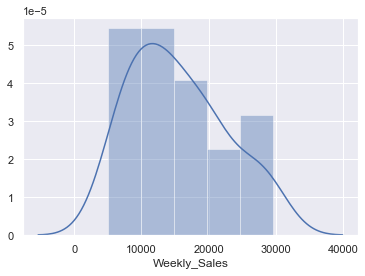

In [19]:
# Plot distplot plot of store mean weekly sales to get a sense of distribution.
_ = sns.distplot(dfcongroup5['Weekly_Sales'])
plt.show()
plt.close()

In [20]:
# Group data by store and type, aggregate mean weekly sales, and reset index
dfcongroup6 = dfcon.groupby(['Store', 'Type'])[['Weekly_Sales']].mean().reset_index()

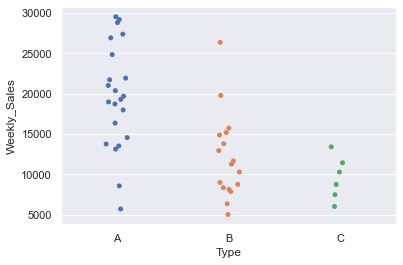

In [21]:
# Visual mean Weekly Sales by store Type
_ = sns.stripplot(x='Type', y='Weekly_Sales', data=dfcongroup6)
plt.show()
plt.close()

In [22]:
# Group data by store and type, aggregate mean weekly sales, and reset index
dfcongroup7 = dfcon.groupby(['Type', 'Size'])[[]].count().reset_index()

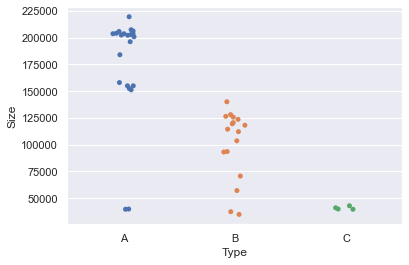

In [23]:
# Visual mean Weekly Sales by store Type
_ = sns.stripplot(x='Type', y='Size', data=dfcongroup7)
plt.show()
plt.close()

In [24]:
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2011-11-03,21280.40,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
1,1,2,2011-11-03,48465.72,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
2,1,3,2011-11-03,10689.97,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
3,1,4,2011-11-03,35229.12,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
4,1,5,2011-11-03,23704.37,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315


In [25]:
#Converting boolean values in holiday column to integers
df2['IsHoliday'] = df2['IsHoliday'].astype(int)

In [26]:
#Converting A/B distinction in Type into integers
df2['Type'] = df2['Type'].replace({'A':0, 'B':1, 'C':2})

In [27]:
df2['Type'] = df2['Type'].astype(int)

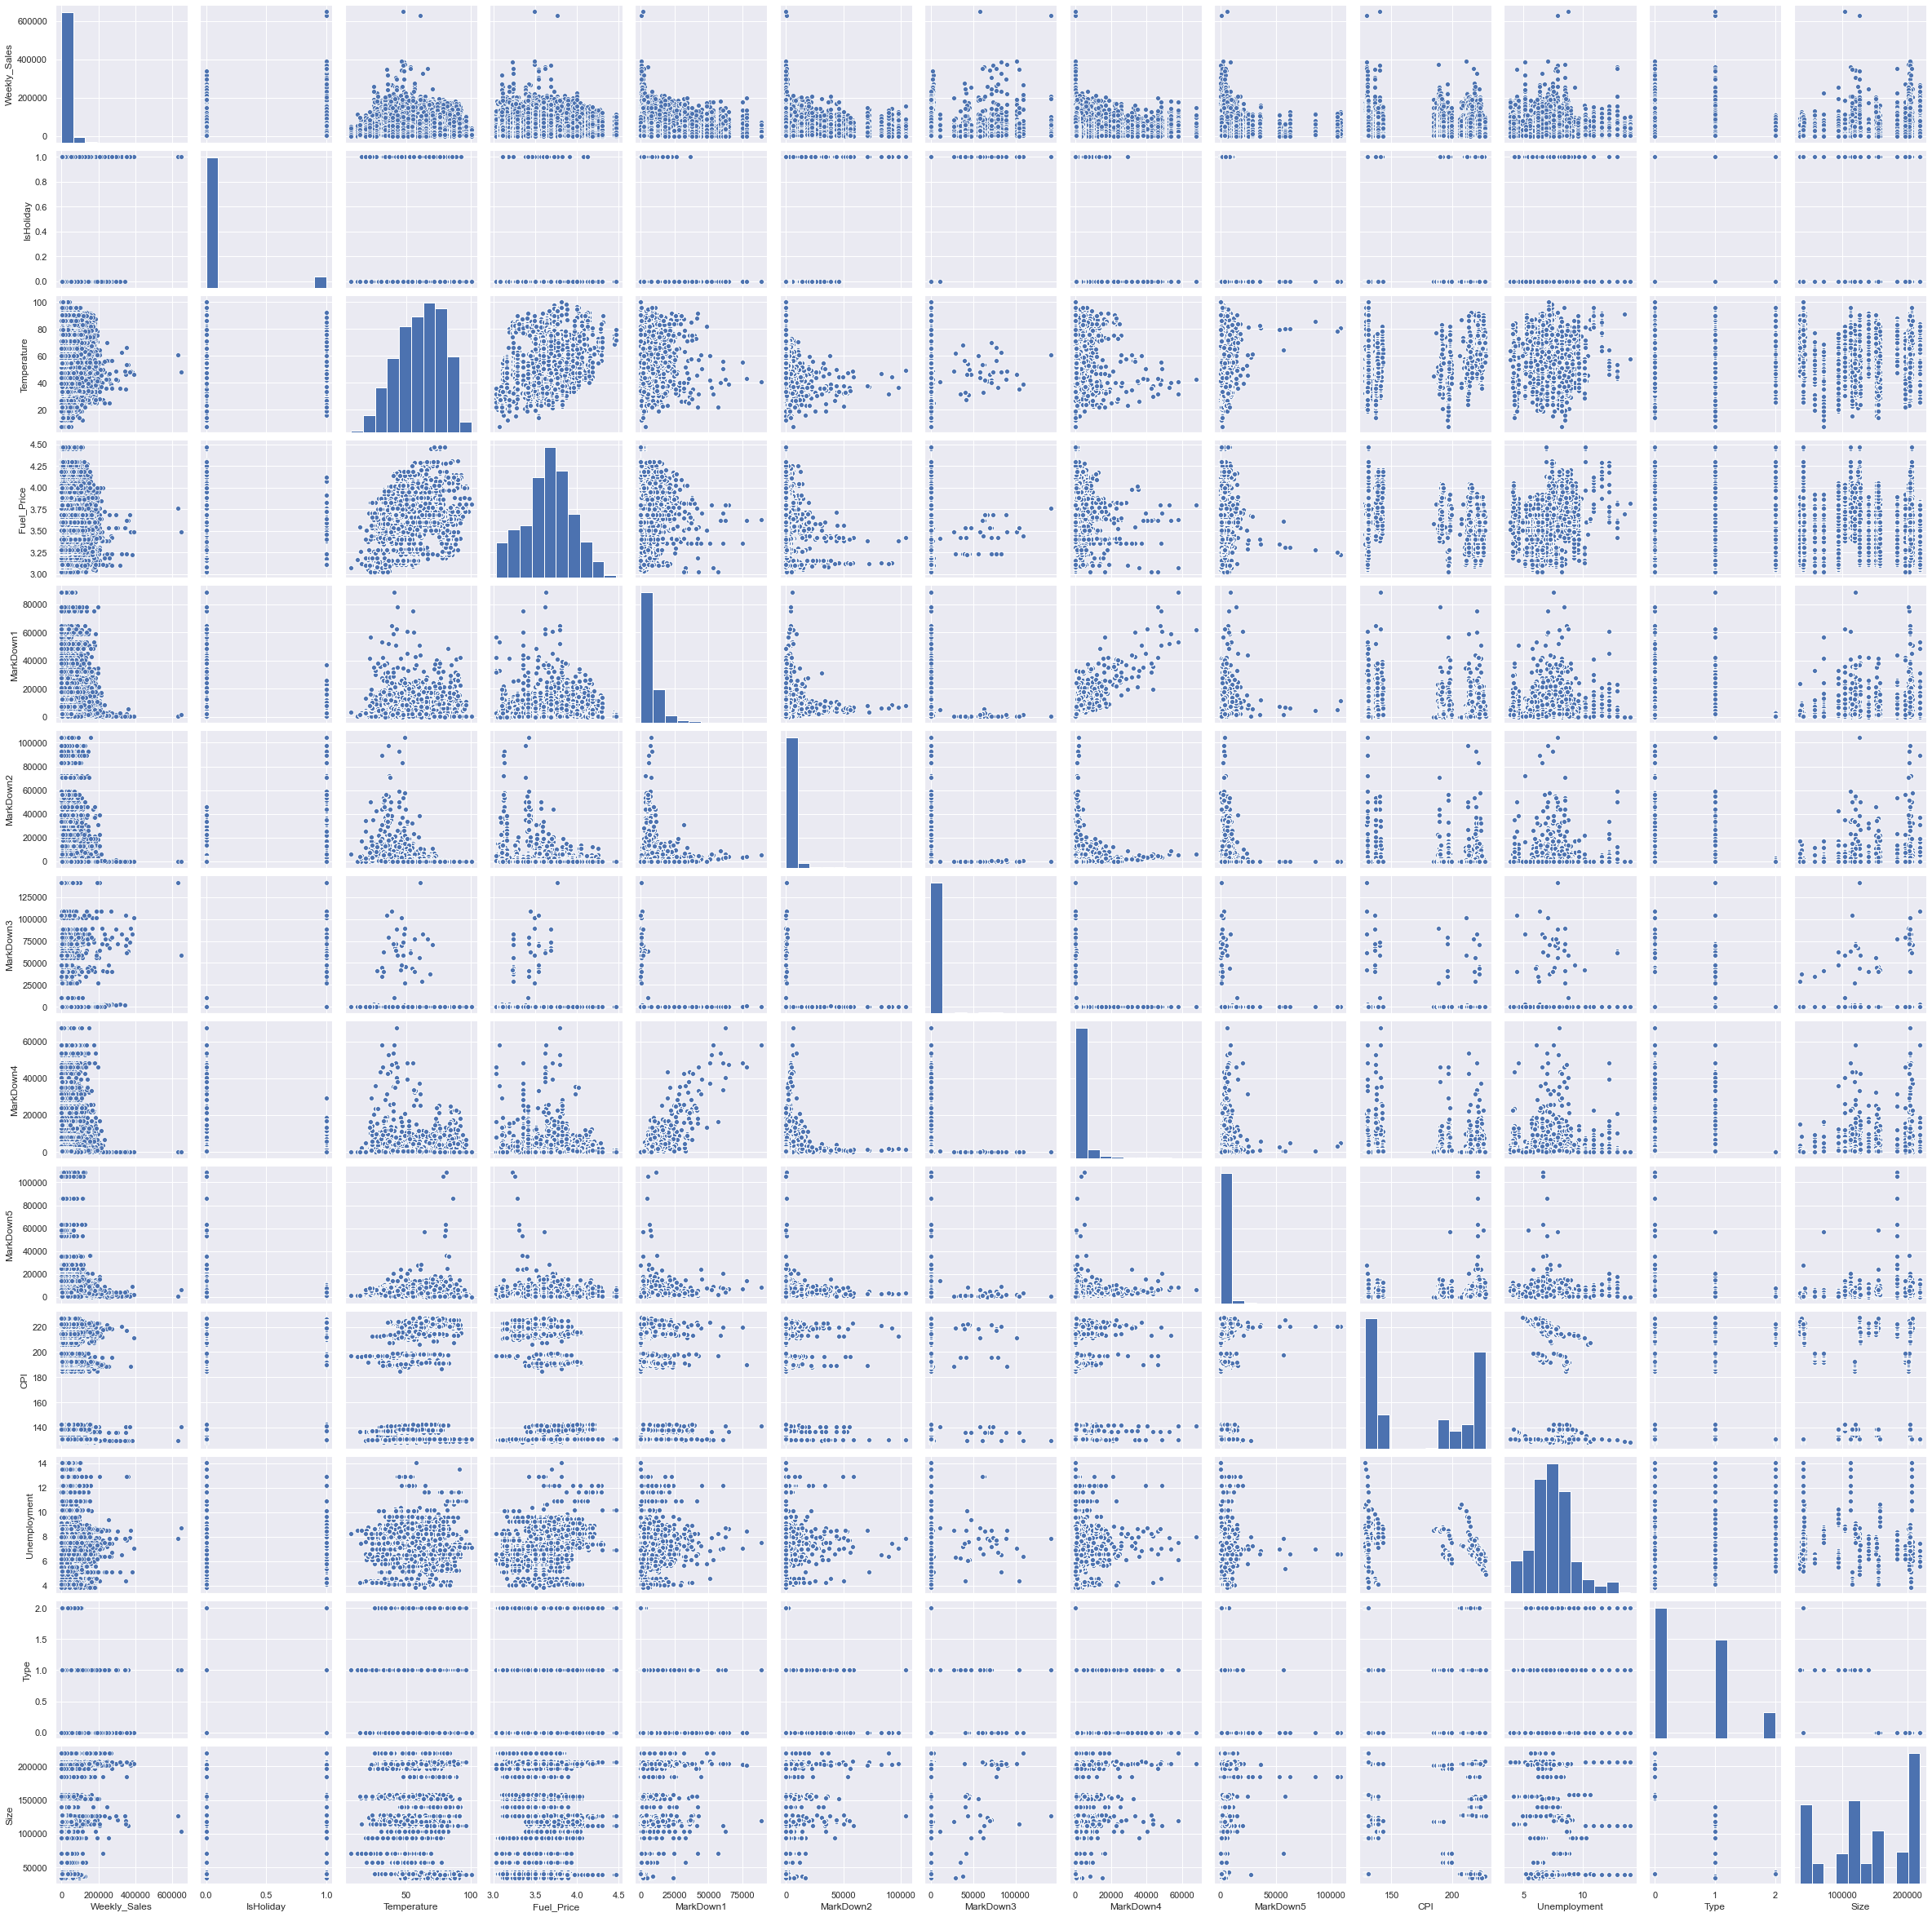

In [28]:
_ = sns.pairplot(df2.drop(columns=['Store', 'Dept']))
plt.show()
plt.close()

Takeaways from the pairplots:
 - MarkDown 3 seems to have the biggest impact on weekly sales.
 - Other MarkDowns seem to have an effect on weekly sales, but not incredibly drastic.
 - MarkDown 4 and MarkDown 1 are related. Should drop one of them.
 - Extreme temperatures (hot or cold) seem to impact weekly_sales negatively.
 - MarkDown 3 seems related to whether it's a holiday. Most instances of MarkDown 3 are on holidays.Perhaps MarkDown 3 is tied to holiday related discounts. 
 - MarkDown 2 is also correlated with holiday status, but the impact of MarkDown 2 is much less than of MarkDown 3.
 - There is potentially a linear correlation between store size and weekly sales
 - CPI and Unemployment don't seem to have a big impact on weekly sales
 - MarkDown 3 almost never occurs simultaneously with other MarkDowns

 

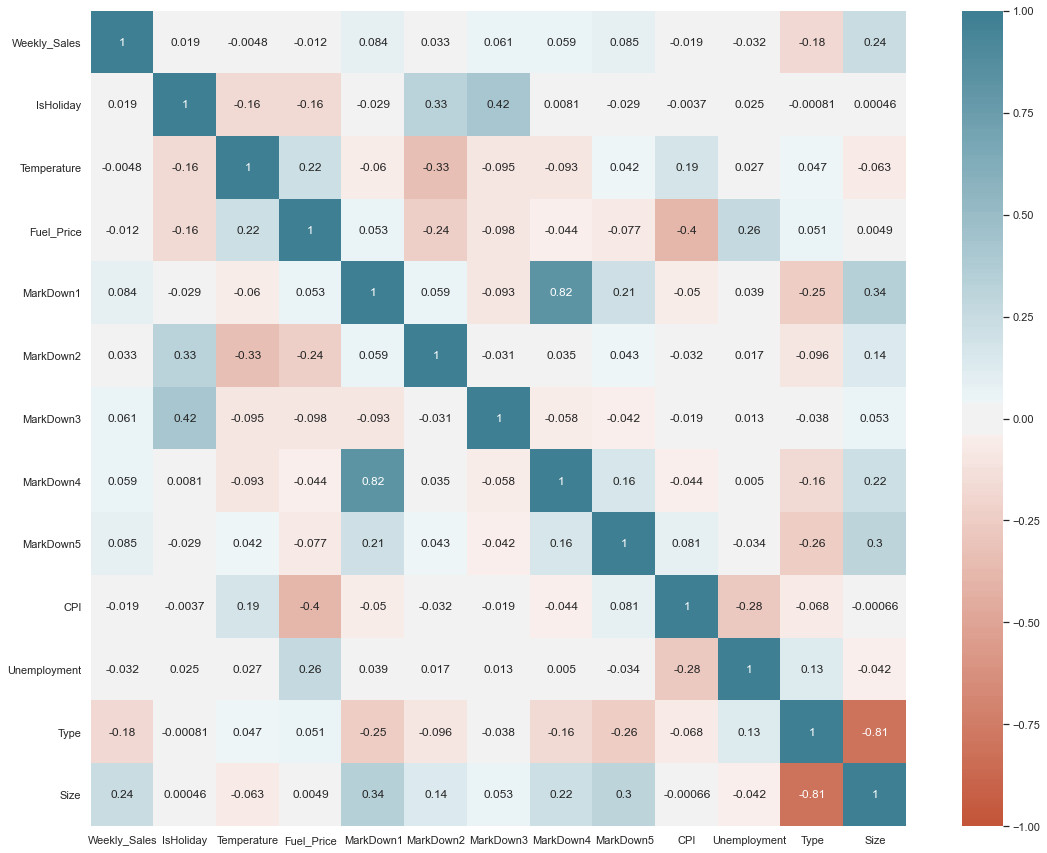

In [29]:
corr = df2.drop(columns=['Store', 'Dept']).corr()

_, ax = plt.subplots(figsize=(20,15))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, ax=ax)



plt.show()
plt.close()

Try logistic regression to predict weekly sales. Try out different models and see what variables are impactful and what variables are not. If it's possible to build a successfully predictive model without markdown explanatory variables, then we should do that because it gives us access to train the entire data set rather than the half that contains markdown data. Would also be worth seeing if date has anything to do with it. We could create a categorical month feature which can be used to see if the month affects sales as well.

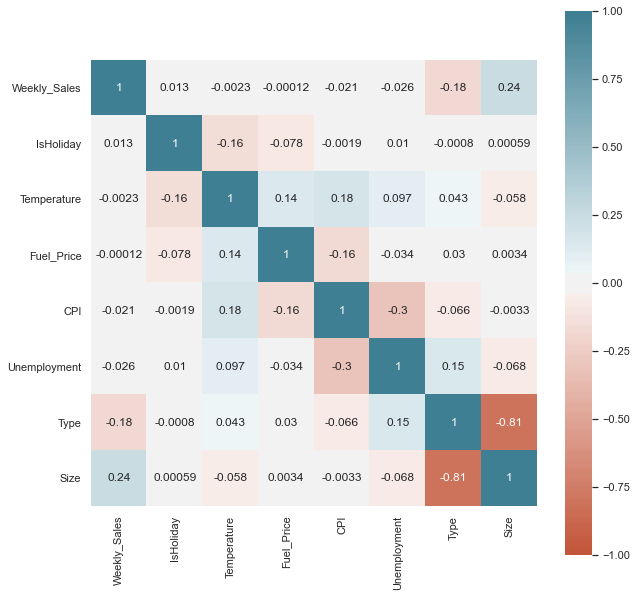

In [30]:
# 
dfcon1 = dfcon
dfcon1['Type'] = dfcon1['Type'].replace({'A':0, 'B':1, 'C':2})
dfcon1['Type'] = dfcon1['Type'].astype(int)

corr = dfcon1.drop(columns=['Store', 'Dept']).corr()
_, ax = plt.subplots(figsize=(10,10))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, ax=ax)

plt.show()
plt.close()

In [31]:
# Weekly Sales doesn't have strong corelation with much

In [32]:
# I really think I should create a categorical month or week feature and fit that in there